# Initial data

```
./treecode in=in_data.txt out=out_data.txt dtime=0.03 eps=0.025 theta=0.1 tstop=10 dtout=0.1 >log.txt
```

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)
%config InlineBackend.figure_format='retina'

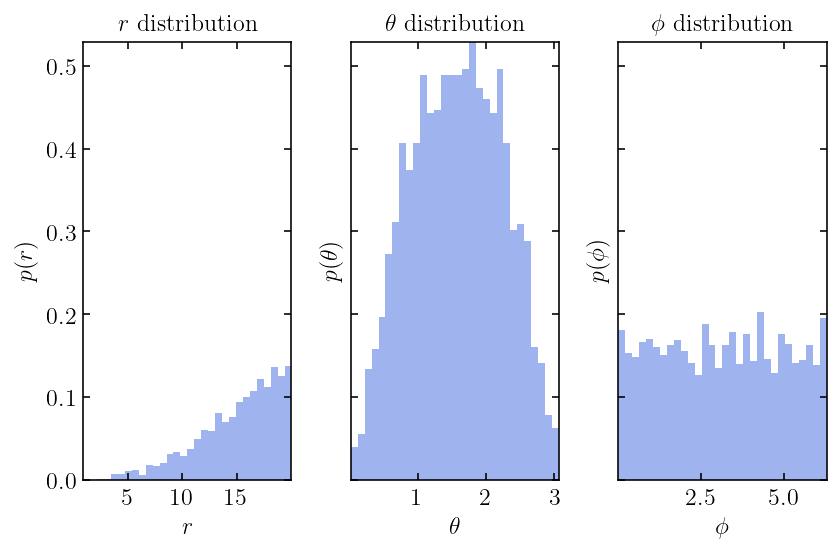

In [52]:
# generating initial points
N = int(3e3)

a = 20 #sphere radius

I = lambda x: a*x**(1/3)
I_theta = lambda x: np.arccos(1-2*x)

P = np.random.uniform(0,1,N) #the two probabilities must have different 
P_theta = np.random.uniform(0,1,N) #seed otherwise there's a correlation between them
r = I(P)
theta = I_theta(P_theta)
phi = np.random.uniform(0, 2*np.pi, N)


fig, axs = plt.subplots(1,3, tight_layout=True, sharey=True)
axs[0].set(title = fr'$r$ distribution', xlabel = r'$r$', ylabel = r'$p(r)$')
axs[0].hist(r, bins = 30, density = True, alpha = .5, color='royalblue', lw = 0)
axs[1].set(title = fr'$\theta$ distribution', xlabel = r'$\theta$', ylabel = r'$p(\theta)$' )
axs[1].hist(theta, bins = 30, density = True, alpha = .5, color='royalblue', lw = 0)
axs[2].set(title = fr'$\phi$ distribution', xlabel = r'$\phi$', ylabel = r'$p(\phi)$' )
axs[2].hist(phi, bins = 30, density = True, alpha = .5, color='royalblue', lw = 0);

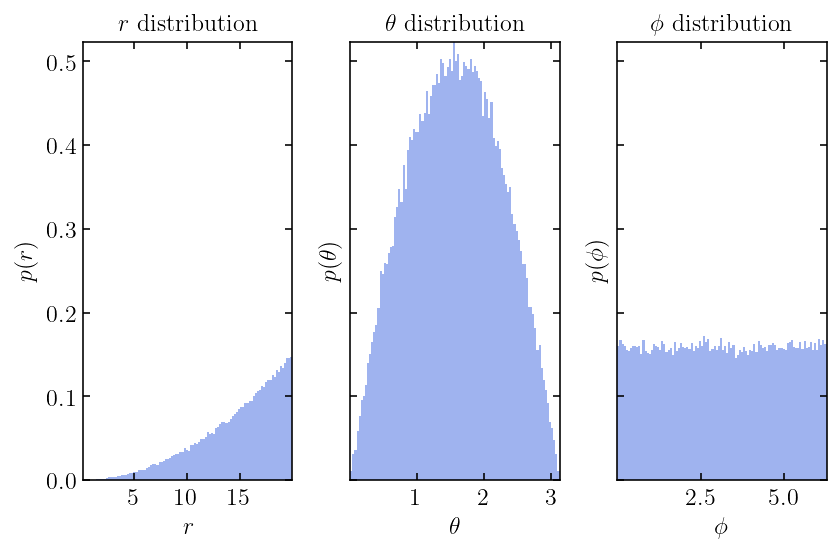

In [53]:
x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

N_m = int(1e5)
P_m = np.random.uniform(0,1,N_m)
P_theta_m = np.random.uniform(0,1,N_m)

r_m = I(P_theta_m)
theta_m = I_theta(P_m)
phi_m = np.random.uniform(0, 2*np.pi, N_m)


fig, axs = plt.subplots(1,3, tight_layout=True, sharey=True)
axs[0].set(title = fr'$r$ distribution', xlabel = r'$r$', ylabel = r'$p(r)$')
axs[0].hist(r_m, bins = 100, density = True, alpha = .5, color='royalblue', lw = 0)
axs[1].set(title = fr'$\theta$ distribution', xlabel = r'$\theta$', ylabel = r'$p(\theta)$' )
axs[1].hist(theta_m, bins = 100, density = True, alpha = .5, color='royalblue', lw = 0)
axs[2].set(title = fr'$\phi$ distribution', xlabel = r'$\phi$', ylabel = r'$p(\phi)$')
axs[2].hist(phi_m, bins = 100, density = True, alpha = .5, color='royalblue', lw = 0);

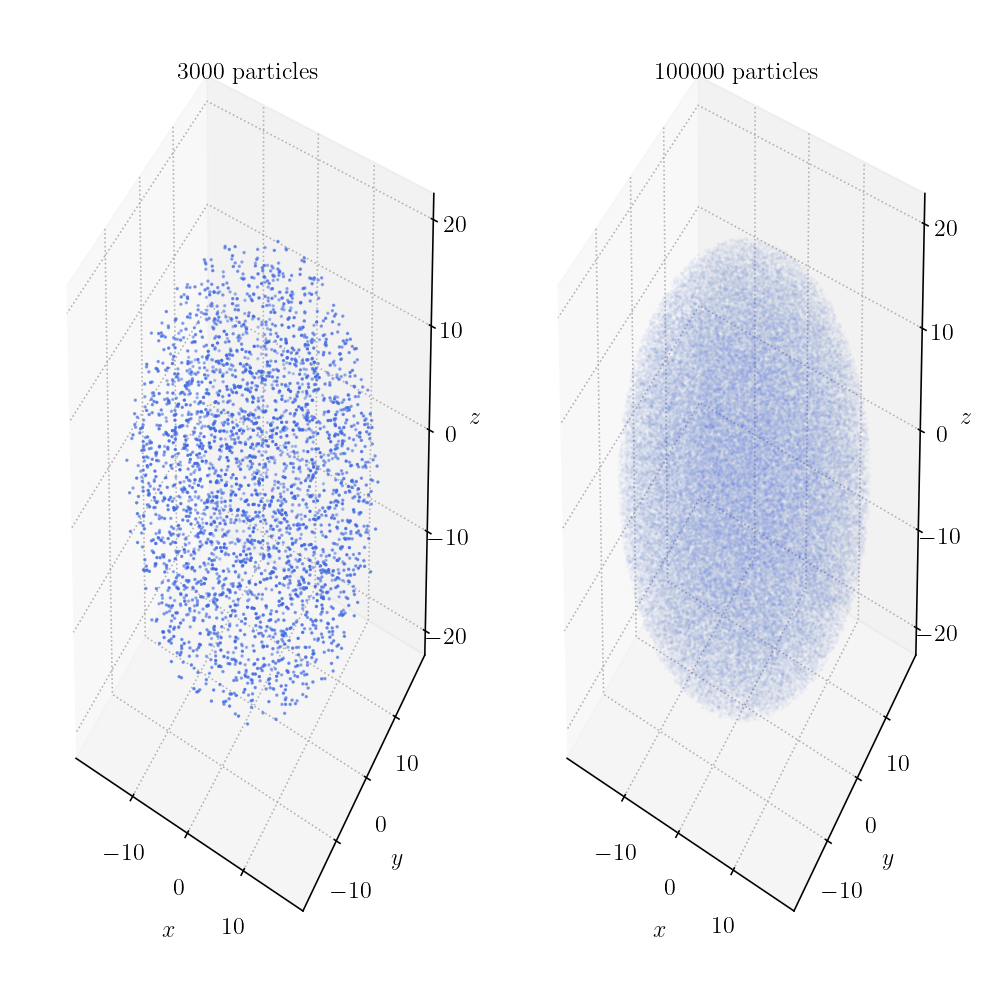

In [54]:
x_m = r_m*np.sin(theta_m)*np.cos(phi_m)
y_m = r_m*np.sin(theta_m)*np.sin(phi_m)
z_m = r_m*np.cos(theta_m)


fig, axs = plt.subplots(1,2, figsize = (7,7), tight_layout = True, subplot_kw={'projection': '3d'})
axs[0].set(aspect='auto', title = f'{N} particles', xlabel = r'$x$', ylabel = r'$y$', zlabel = r'$z$')
axs[0].scatter(x,y,z, s = .5, color='royalblue')
axs[1].set(aspect='auto', title = f'{N_m} particles', xlabel = r'$x$', ylabel = r'$y$', zlabel = r'$z$')
axs[1].scatter(x_m,y_m,z_m, s =.5, color='royalblue', alpha = .025);

Density is compatible with a delta function for 50.27%.


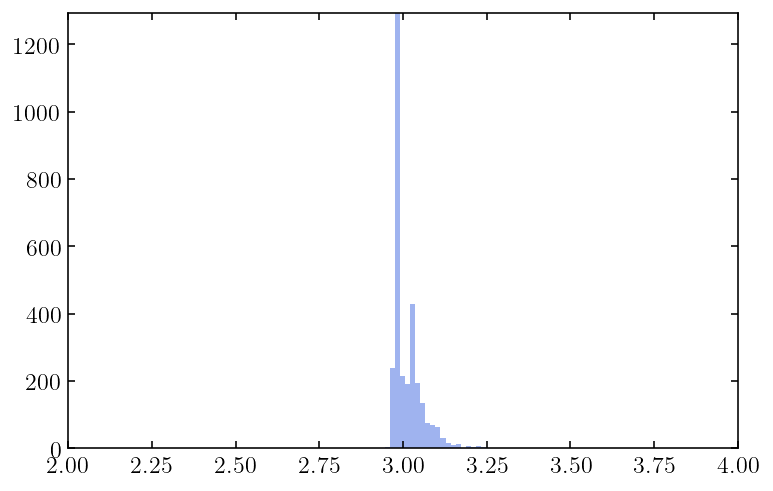

In [55]:
#Checking density
steps = 3000
scan = np.linspace(2, a, steps)
volume = 0
density = []

for i in scan:
    volume = (4/3) * np.pi * (i**3)
    mask = tuple([r_m <= i])
    new_r = r_m[mask]
    number = len(new_r)
    density.append(number/volume)

density = np.array(density)
counts, bins = np.histogram(density)
plt.hist(density, bins=20, color = 'royalblue', alpha = .5, lw = 0)
plt.xlim([2,4])
max = np.max(counts)
prob = max/steps
print('Density is compatible with a delta function for {:.2f}%.'.format(prob*100));

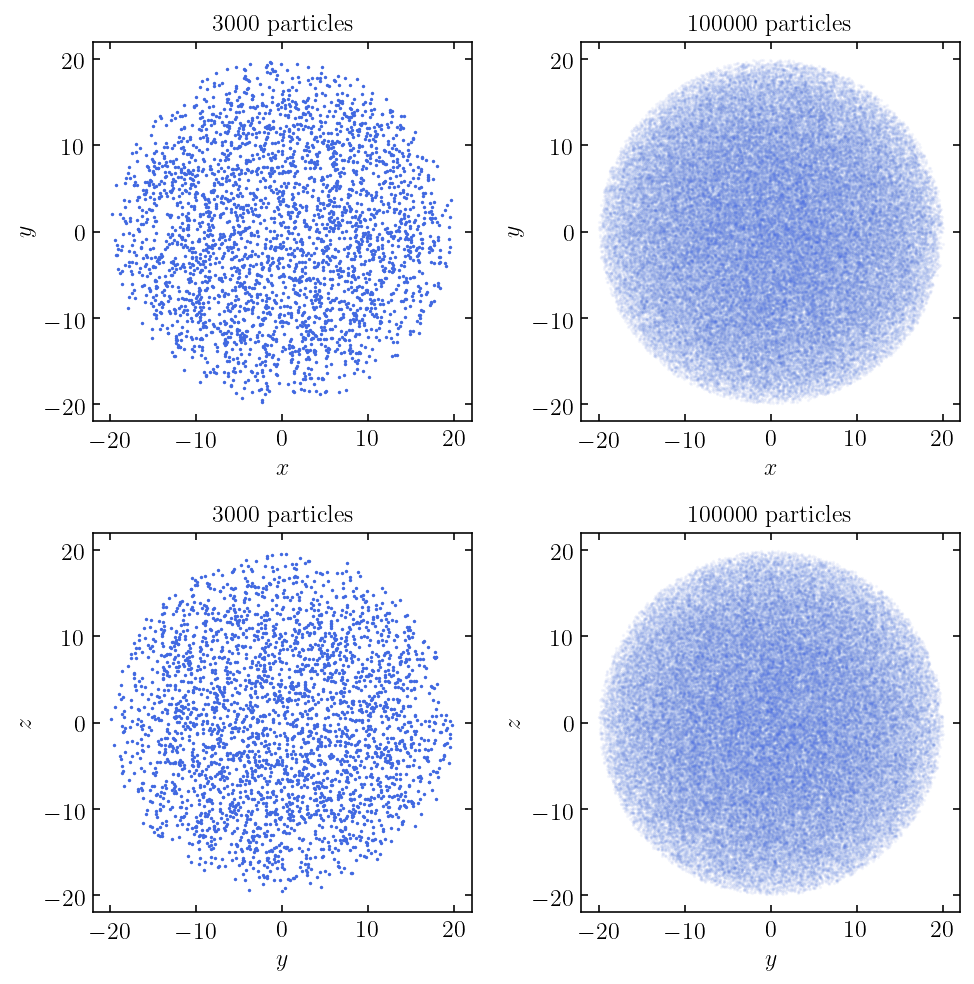

In [56]:
fig, axs = plt.subplots(2,2, figsize = (7,7), tight_layout = True)

for j in range(2):
    axs[0,j].set(xlabel = r'$x$', ylabel = r'$y$')
    axs[1,j].set(xlabel = r'$y$', ylabel = r'$z$')
    for i in range(2):
        axs[i,j].set(aspect='equal', xlim = [-22,22], ylim = [-22,22])
        axs[i,0].set(title = f'{N} particles')  
        axs[i,1].set(title = f'{N_m} particles')
    
axs[0,0].scatter(x,y, s = .5, color='royalblue')
axs[1,0].scatter(y,z, s = .5, color='royalblue')
axs[0,1].scatter(x_m,y_m, s = .5, color='royalblue', alpha =.05)
axs[1,1].scatter(y_m,z_m, s = .5, color='royalblue', alpha =.05);

In [57]:
# creating the input file
m = np.zeros(N)
dim = 3

for k in range(N):
    m[k] = .5

with open ('tree/in_data.txt', 'w+') as f:
    f.write(str(N) + '\n')
    f.write(f'{dim}' + '\n')
    f.write('0' + '\n')
    for m_i in m:
        f.write(f'{m_i}' + '\n')
    for i in range(N):
        f.write(f'{x[i]} {y[i]} {z[i]}' + '\n')
    for j in range(N):
        f.write(f'0 0 0' + '\n')

# Fetching

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

In [60]:
lines = pd.read_csv('tree/out_data.txt', names = list(range(3)), sep = '\s+')
N_particles = N
s = N*3+3

t = np.array([lines.iloc[2::s,0].copy().dropna()]).flatten()

m = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(3, N+3)])
x = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(N+3, 2*N+3)])
y = np.array([lines.iloc[i::s,1].copy().dropna() for i in range(N+3, 2*N+3)])
z = np.array([lines.iloc[i::s,2].copy().dropna() for i in range(N+3, 2*N+3)])
vx = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(2*N+3, 3*N+3)])
vy = np.array([lines.iloc[i::s,1].copy().dropna() for i in range(2*N+3, 3*N+3)])
vz = np.array([lines.iloc[i::s,2].copy().dropna() for i in range(2*N+3, 3*N+3)])

In [ ]:
print(x)

In [ ]:
print(x.shape)

# Animation

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

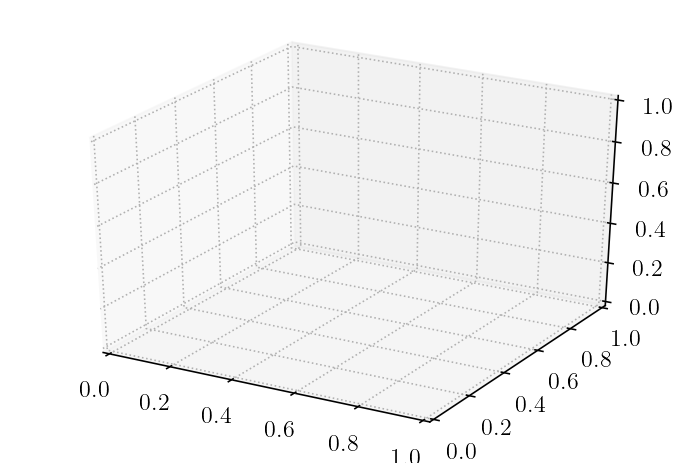

In [26]:
# simulation
from matplotlib import animation

def update(num):
    N = len(m)   #N_particles
    l = 50
    ax.clear()
    
    ax.scatter(x[:,num-1], y[:,num-1], z[:,num-1], color = 'royalblue', s = 2.5 ,alpha = .3)        # Updating Point Location

    ax.set_title(f'{N} particles, mass = {m[0,0]}, time = {round(t[num],1)}')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_zlim(-l, l)
    

## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(aspect='equal')
line_ani = animation.FuncAnimation(fig, update, interval=1,   
                                   frames=tqdm(range(len(t))))

# Saving the Animation
f = r"sphere.gif"
writergif = animation.PillowWriter(fps=30)
line_ani.save(f, writer=writergif)

plt.show()

0.1478498864666985


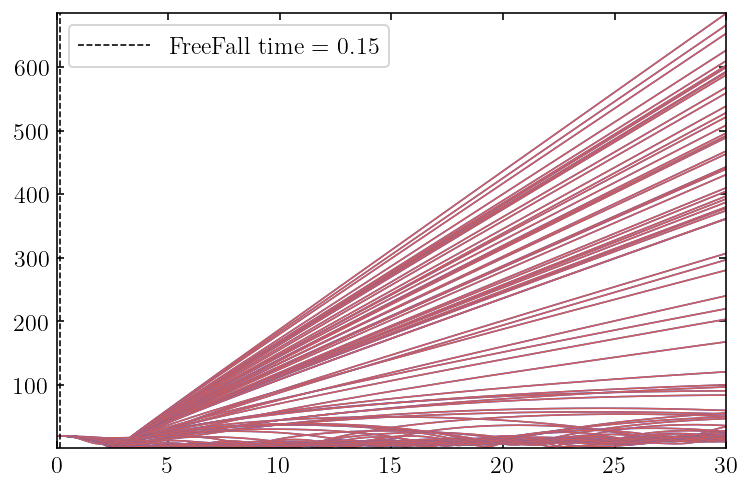

In [61]:
r = np.sqrt(x**2 + y**2 + z**2)
r_i = r[:,0]                                 #i take all points at time 0
mask = (r_i >= 19.8) & (r_i <= 20.2)         #i take only the external ones at time 0


x_cm = np.sum(x[:, 0]*m[:, 0])/np.sum(m)
y_cm = np.sum(y[:, 0]*m[:, 0])/np.sum(m)
z_cm = np.sum(z[:, 0]*m[:, 0])/np.sum(m)

r_cm = np.sqrt((x - x_cm)**2 + (y - y_cm)**2 + (z -z_cm)**2)

r_ext_cm = r_cm[mask, :]                           #i take the external ones at all times 
r_ext = r[mask, :]                           #i take the external ones at all times 

#r[0,:] is the same particle at all times 
#r[:,0] is all particles at a specific time
num_points = len(r_i[mask])

for i in range(num_points):
    plt.plot(t, r_ext[i,:],  c='royalblue', lw = .8)        #Not corrected
    plt.plot(t, r_ext_cm[i,:],  c='indianred', lw = .8)     #Corrected for CM

rho = np.sum(m)/((4/3)*np.pi*a**3)
G = 1
t_ff = np.sqrt((3*np.pi)/(32*G*rho))
print(t_ff)

plt.axvline(t_ff, color = 'black', ls = '--', lw = .8, label=f'FreeFall time = {round(t_ff, 2)}')
plt.legend()
plt.show()

free fall time: 0.15
dynamical time: 0.21


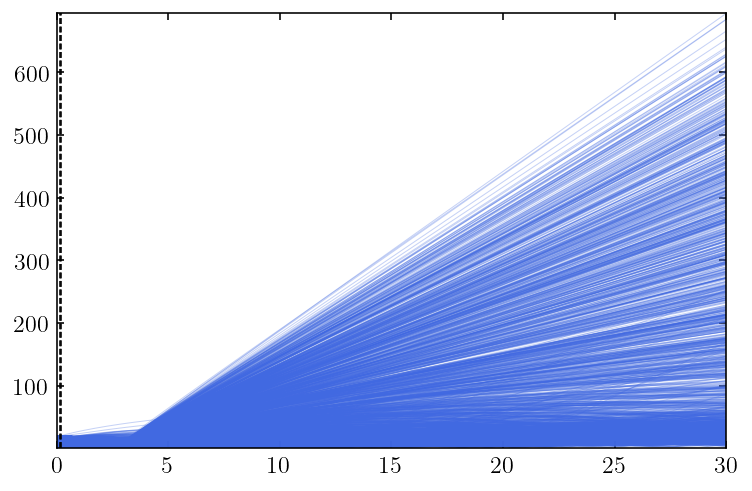

In [62]:
for i in range(len(r)):
    plt.plot(t,r[i,:], c='royalblue', alpha = .3, lw = .5);
rho = np.sum(m)/((4/3)*np.pi*a**3)
G = 1
t_ff = np.sqrt((3*np.pi)/(32*G*rho))
t_dyn = np.sqrt(3*np.pi/(16*G*rho))
print(f'free fall time: {round(t_ff,2)}')
print(f'dynamical time: {round(t_dyn,2)}')

plt.axvline(t_ff, color = 'black', ls = '--', lw = .8);
plt.axvline(t_dyn, color = 'black', ls = '--', lw = .8);